In [1]:
import ema as em
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
%config InlineBackend.figure_format = 'svg'

# Example 12.3r

(Page 335 of CE-220 Fall 2019 course reader)

In [2]:
mdl = em.rModel(2,3)

n1 = mdl.node('1',  0.0,  0.0)
n2 = mdl.node('2',  0.0,  5.0)
n3 = mdl.node('3',  4.0,  5.0)
n4 = mdl.node('4',  8.0,  5.0)
n5 = mdl.node('5',  8.0,  0.0)

a = mdl.beam('a', n1,  n2, Qpl = [1e6, 150, 150])
b = mdl.beam('b', n2,  n3, Qpl = [1e6, 120, 120])
c = mdl.beam('c', n3,  n4, Qpl = [1e6, 120, 120])
d = mdl.beam('d', n4,  n5, Qpl = [1e6, 150, 150])

mdl.fix(n1, ['x', 'y', 'rz'])
mdl.fix(n5, ['x', 'y', 'rz'])

n2.p['x'] = 30
n3.p['y'] = -50

mdl.DOF = [[6, 7, 8],[1, 7, 2], [1, 3, 4], [1, 9, 5], [10, 9, 11]]

em.analysis.characterize(mdl)

(0, 3)

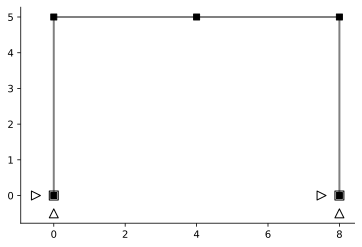

In [3]:
fig, ax = plt.subplots()
em.plot_structure(mdl, ax)

In [4]:
# Define plastic capacity
Qp_c = 150
Qp_g = 120
a.Qp['+']['1'] = a.Qp['-']['1'] = 10000
a.Qp['+']['2'] = a.Qp['-']['2'] = Qp_c
a.Qp['+']['3'] = a.Qp['-']['3'] = Qp_c
d.Qp['+']['1'] = d.Qp['-']['1'] = 10000
d.Qp['+']['2'] = d.Qp['-']['2'] = Qp_c
d.Qp['+']['3'] = d.Qp['-']['3'] = Qp_c

b.Qp['+']['1'] = b.Qp['-']['1'] = 10000
b.Qp['+']['2'] = b.Qp['-']['2'] = Qp_g
b.Qp['+']['3'] = b.Qp['-']['3'] = Qp_g
c.Qp['+']['1'] = c.Qp['-']['1'] = 10000
c.Qp['+']['2'] = c.Qp['-']['2'] = Qp_g
c.Qp['+']['3'] = c.Qp['-']['3'] = Qp_g

In [10]:
A = em.A_matrix(mdl)
A.c

,$1$,$2$,$3$,$4$,$5$
$a_2$,0.2,0.0,0.00,0.0,0.0
$a_3$,0.2,1.0,0.00,0.0,0.0
$b_2$,0.0,1.0,-0.25,0.0,0.0
$b_3$,0.0,0.0,-0.25,1.0,0.0
$c_2$,0.0,0.0,0.25,1.0,0.0
$c_3$,0.0,0.0,0.25,0.0,1.0
$d_2$,0.2,0.0,0.00,0.0,1.0
$d_3$,0.2,0.0,0.00,0.0,0.0


In [6]:
lambdac, Q = em.analysis.PlasticAnalysis_wLBT(mdl)

In [11]:
lambdac

2.2285714285714295

In [13]:
b.dofs


array([1., 7., 2., 1., 3., 4.])